In [7]:
import numpy as np
from scipy import signal
from scarlet.observation import convolve
from scarlet.interpolation import get_filter_coords, get_filter_bounds
from scarlet import fft

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
# The PSFex PSF size is always 41 or 43 pixels
psf_size = 41
psf_shape = (psf_size, psf_size)

psf = np.random.random(psf_size*psf_size).reshape(psf_shape)

# Objects used for scarlet fft convolutions
_psf = fft.Fourier(psf)

# Objects used for scarlet direct convolutions
coords = get_filter_coords(psf)
bounds = get_filter_bounds(coords.reshape(-1, 2))

img_sizes = [20, 50, 100, 200] # small, average, moderately size blends

scipy_fft = []
scipy_fft_err = []
scipy_real = []
scipy_real_err = []
scarlet_fft = []
scarlet_fft_err = []
scarlet_real = []
scarlet_real_err = []

for img_size in img_sizes:
    shape = (img_size, img_size)
    print("\n\nPSF shape", shape)
    
    img = np.random.random(img_size*img_size).reshape(shape)
    _img = fft.Fourier(img)

    print("\nscipy fft convolve")
    result = %timeit -o signal.convolve(img, psf, method="fft")
    scipy_fft.append(result.average)
    scipy_fft_err.append(result.stdev)
    
    print("\nscipy direct convolve")
    result = %timeit -o signal.convolve(img, psf, method="direct")
    scipy_real.append(result.average)
    scipy_real_err.append(result.stdev)

    print("\nscarlet fft convolve")
    result = %timeit -o fft.convolve(_img, _psf)
    scarlet_fft.append(result.average)
    scarlet_fft_err.append(result.stdev)


    print("\nscarlet direct convolve")
    result = %timeit -o convolve(img[None, :, :], psf[None, :, :], bounds)
    scarlet_real.append(result.average)
    scarlet_real_err.append(result.stdev)



PSF shape (20, 20)

scipy fft convolve
550 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

scipy direct convolve
17.4 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

scarlet fft convolve
287 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

scarlet direct convolve
181 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


PSF shape (50, 50)

scipy fft convolve
715 µs ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

scipy direct convolve
165 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

scarlet fft convolve
376 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

scarlet direct convolve
1.31 ms ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


PSF shape (100, 100)

scipy fft convolve
1.06 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

scipy direct convolve
453 ms ± 36.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


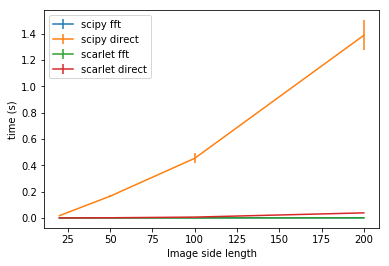

In [17]:
plt.errorbar(img_sizes, scipy_fft, yerr=scipy_fft_err, label="scipy fft")
plt.errorbar(img_sizes, scipy_real, yerr=scipy_real_err, label="scipy direct")
plt.errorbar(img_sizes, scarlet_fft, yerr=scarlet_fft_err, label="scarlet fft")
plt.errorbar(img_sizes, scarlet_real, yerr=scarlet_real_err, label="scarlet direct")
plt.legend()
plt.xlabel("Image side length")
plt.ylabel("time (s)")
plt.show()

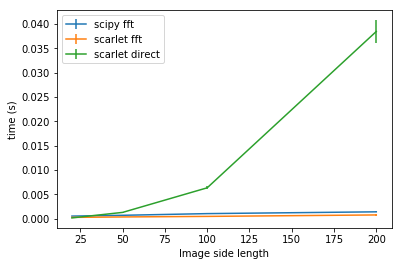

In [18]:
plt.errorbar(img_sizes, scipy_fft, yerr=scipy_fft_err, label="scipy fft")
plt.errorbar(img_sizes, scarlet_fft, yerr=scarlet_fft_err, label="scarlet fft")
plt.errorbar(img_sizes, scarlet_real, yerr=scarlet_real_err, label="scarlet direct")
plt.legend()
plt.xlabel("Image side length")
plt.ylabel("time (s)")
plt.show()

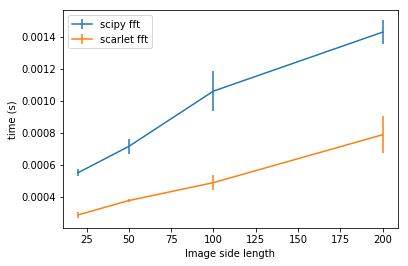

In [19]:
plt.errorbar(img_sizes, scipy_fft, yerr=scipy_fft_err, label="scipy fft")
plt.errorbar(img_sizes, scarlet_fft, yerr=scarlet_fft_err, label="scarlet fft")
plt.legend()
plt.xlabel("Image side length")
plt.ylabel("time (s)")
plt.show()